# Lab 8 - Decision Tree/Random Forest

In [23]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<hr>

## <b>Heart Disease Dataset:</b>
<br>
Here, is the link for heart disease dataset of patients. <a>http://archive.ics.uci.edu/ml/datasets/Heart+Disease</a> 
<br>
After going to this link you will find two folders: 
<li>One: Data Folder</li> 
<li>two: Dataset description.</li> </em> It is better to use processed cleveland data. 
<br>
<br>
In the dataset description folder, you will find the description about the columns’ names referring to the 14 column of the dataset as the following: <strong>The last one attribute (number 14) is the result. </strong> Include your R source code of regression analysis, training and generating results. Here are the example of attributes and their Information (please see data set documents for more details)

<ol>
<li> #3 (age) </li>
<li> #4 (sex) </li>
<li> #9 (cp) </li>
<li> #10 (trestbps)</li> 
<li> #12 (chol)</li>
<li> #16 (fbs) </li>
<li> #19 (restecg) </li>
<li> #32 (thalach) </li>
<li> #38 (exang) </li>
<li> #40 (oldpeak)</li>
</ol> .........
<li>13. #51 (thal)</li>  
<li>14. #58 (num)</li>  
<br>
--------------------------->result <br>

In [24]:
#read in heart disease data
heartDiseaseData = pd.read_csv('heart-disease-dataset2.csv')
heartDiseaseData.describe()
print("Number of missing data:",heartDiseaseData.isna().any().sum())
print("Number of duplicate data:",heartDiseaseData.duplicated().sum())
heartDiseaseData = heartDiseaseData.replace('?',np.NaN)
heartDiseaseData = heartDiseaseData.dropna()


Number of missing data: 0
Number of duplicate data: 0


# Option 1 – Decision Tree
`Total Marks: 8 Marks + 2 (individual assessment) = 10 Marks`


In this part you will use Python to analyze the heart disease data set (the link and explanation is included here) by training and building a model with `Decision Tree`.

<b>Tips:</b><br>
<br>• Refer lecture notes titled `“Decision Tree”` before starting this assignment
<br>• Use Python library “sklearn” to construct the decision tree
<br><br>• For visualization, you need to the followings:
<br>o To install `graphviz`, download the Windows executables from from <a>https://graphviz.org/download/</a>
<br>o To install `pydotplus`, you need to open the Command Prompt window by clicking the Start button. In the search box, type Command Prompt, and then, in the list of results, click Command Prompt. At the command prompt, `type pip install Graphviz`.

Test your model and discuss the result of your test with performance metrics. Make sure you separate training set and testing data properly (Train:80 and Test:20) and implement the decision tree using Python for the followings:

In [25]:
#Library for DecisionTree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Library to create DecisionTree Graph
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree

#print dataset shape
print("Dataset Length: ",len(heartDiseaseData))
print("Dataset Shape: ", heartDiseaseData.shape)
print(heartDiseaseData.head())

Dataset Length:  297
Dataset Shape:  (297, 14)
    age  sex   cp  tresbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0    145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0    160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0    120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0    130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0    130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  result  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


### **1. Use gini measure quality of split and build the decision tree. Record the model accuracy.**

In [26]:
X = heartDiseaseData.drop(['result'],axis=1)
Y = heartDiseaseData['result']

X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=5)

#DecisionTree using Gini Index
ds_gini = DecisionTreeClassifier(criterion='gini')

#performing training
ds_train = ds_gini.fit(X_train,Y_train)
predictions = ds_train.predict(X_test)
predictions


array([0, 0, 0, 3, 0, 0, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 3, 0, 0, 0,
       0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 4, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 3, 0, 2, 0, 3, 0, 0, 3, 4, 1, 0, 0, 1])

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy score using Gini is :' ,accuracy_score(Y_test,predictions))

Accuracy score using Gini is : 0.5


In [28]:
#Importance of each features in model prediction
print(X_train.columns)
print(ds_train.feature_importances_)

Index(['age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[0.14822197 0.         0.02076817 0.14863783 0.11625663 0.
 0.01340657 0.14284501 0.05100476 0.08803034 0.04901701 0.08131619
 0.14049551]


### **2. Visualize the decision tree built in Question-1**

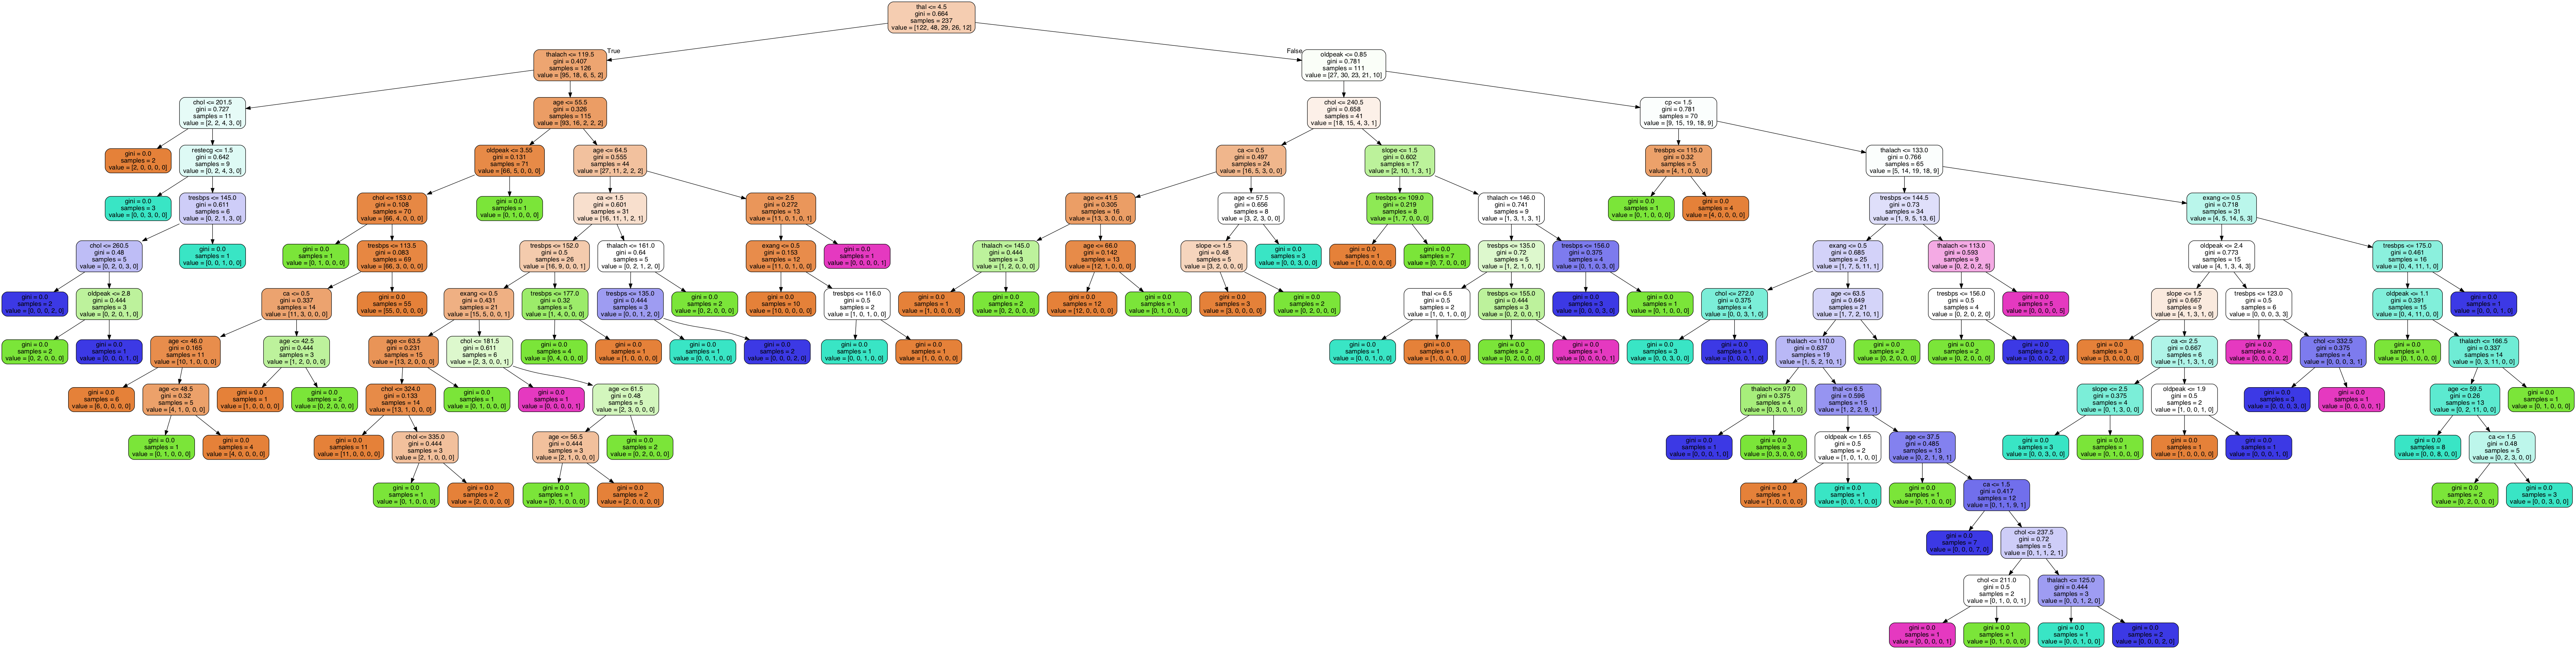

In [29]:
import graphviz 
import pydotplus

#create dot data
dot_data = export_graphviz(ds_train,out_file=None,feature_names=list(X_train.columns.values),
rounded=True,filled=True)

#create graph from DOT data
graph= pydotplus.graph_from_dot_data(dot_data)
print(graph)
#show graph
Image(graph.create_png())


### **3. Change max_depth=3 and rebuild the decision tree. Record the model accuracy.**

In [30]:
#DecisionTree using Gini Index
ds_gini_max = DecisionTreeClassifier(max_depth=3,criterion='gini')

#performing training
ds_train_max = ds_gini_max.fit(X_train,Y_train)
predictions = ds_train_max.predict(X_test)
predictions

array([0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2])

In [31]:
print('Accuracy score(Gini) when change max_depth to 3 is :' ,accuracy_score(Y_test,predictions))

Accuracy score(Gini) when change max_depth to 3 is : 0.6


### **4. Visualize the decision tree built in Question-3**

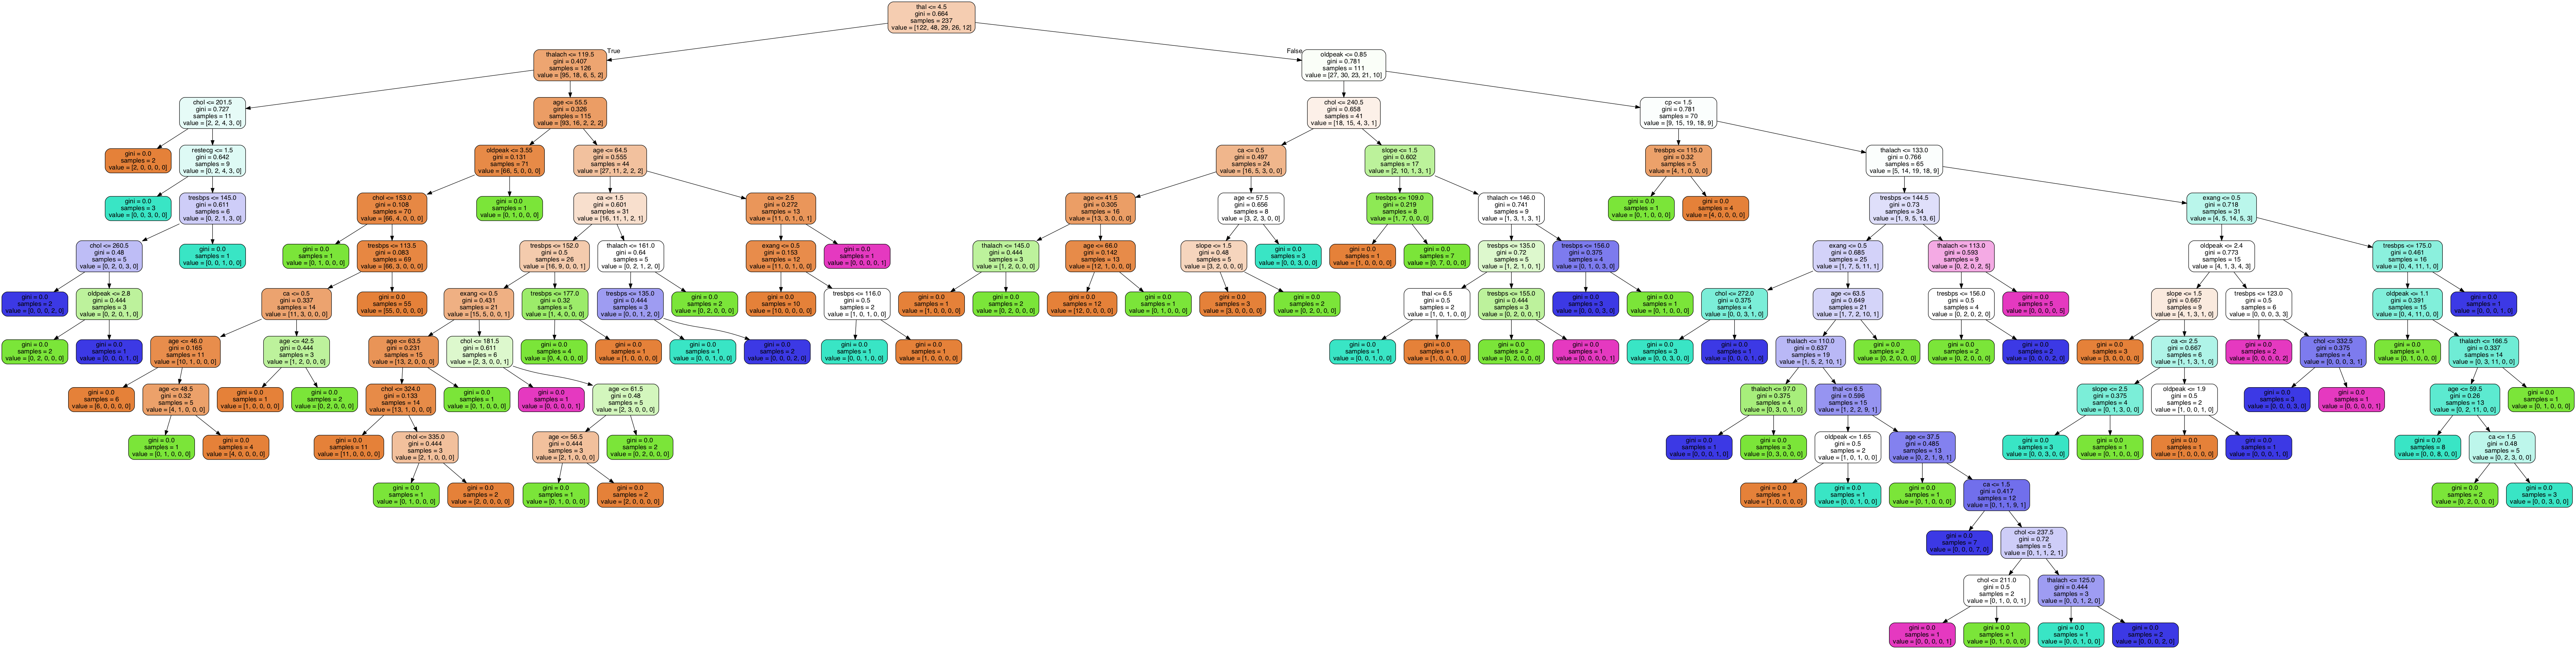

In [32]:
dot_data = export_graphviz(ds_train,out_file=None,feature_names=list(X_train.columns.values),rounded=True,filled=True)

#create graph from DOT data
graph= pydotplus.graph_from_dot_data(dot_data)
print(graph)
#show graph
Image(graph.create_png())

### **5. Use entropy measure quality of split and build the decision tree. Record the model accuracy.**

In [33]:
ds_entropy = DecisionTreeClassifier(criterion='entropy')

#performing training
ds_train = ds_entropy.fit(X_train,Y_train)
predictions = ds_train.predict(X_test)
predictions

array([3, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1,
       1, 3, 0, 1, 0, 0, 0, 1, 4, 0, 1, 1, 3, 3, 4, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 4, 0, 1, 1, 4, 1, 0, 4, 3])

In [34]:
print('Accuracy score when using Entropy is :' ,accuracy_score(Y_test,predictions))

Accuracy score when using Entropy is : 0.5166666666666667


### **6. Visualize the decision tree built in Question-5**

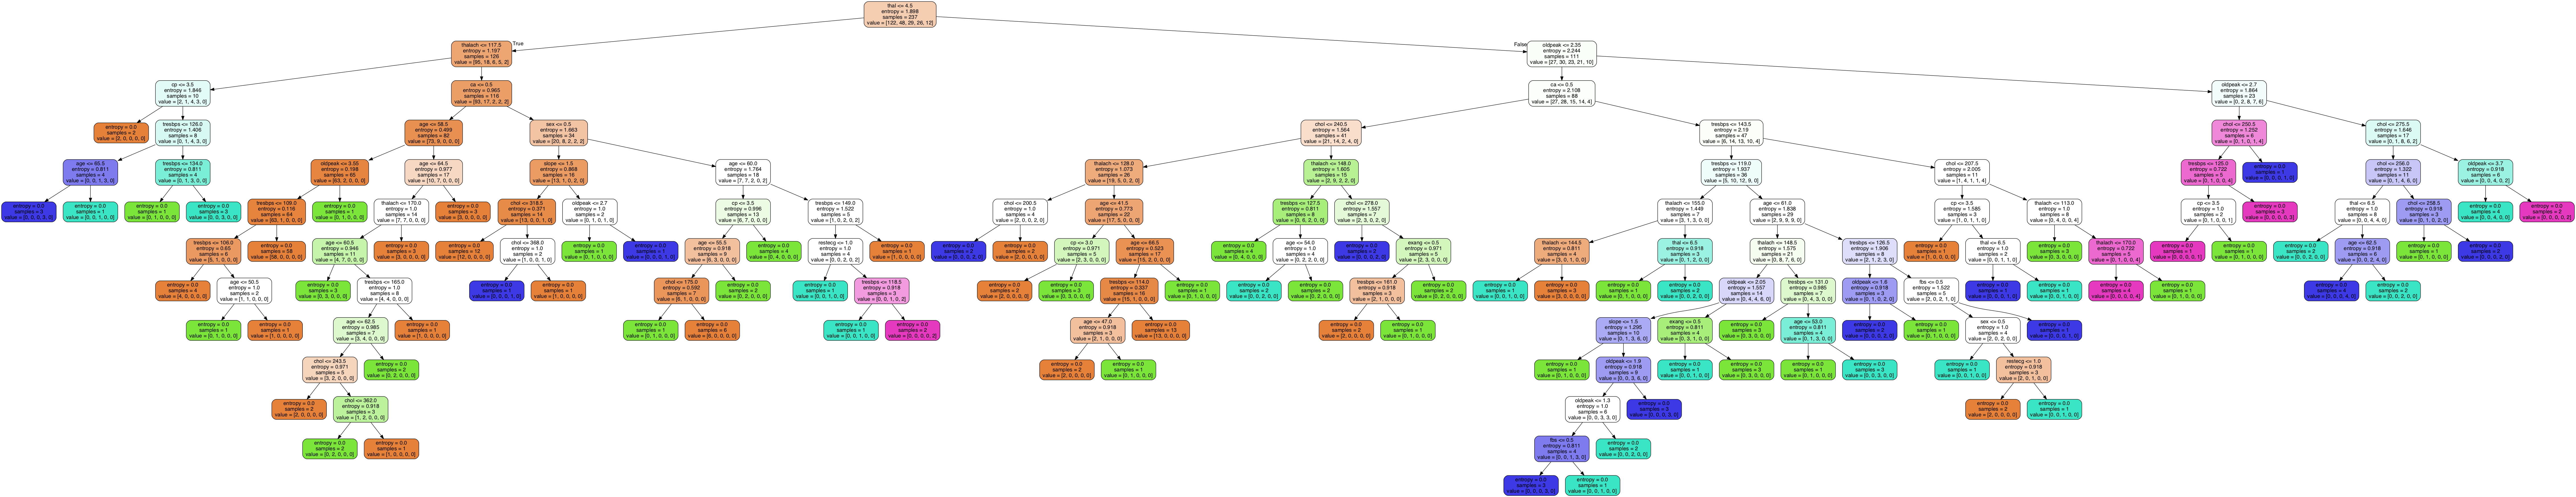

In [35]:
dot_data = export_graphviz(ds_train,out_file=None,feature_names=list(X_train.columns.values)
,rounded=True,filled=True)

#create graph from DOT data
graph= pydotplus.graph_from_dot_data(dot_data)
print(graph)
#show graph
Image(graph.create_png())

*NOTE: each time code is run, accuracy changes slightly*
<br>
|Decision Tree|Accuracy|
|--------|-----------|
|Gini|0.58|
|Max_depth=3 (Gini)|0.60|
|Entropy|0.62|


<hr>

# Option 2 - Random Forest

`Total Marks: 8 Marks`
In this part you will use Python to analyze the heart disease data set (the link and explanation is included here) by training and building a model with `Random Forest`.

<b>Tips:</b>
<br>• Refer lecture notes titled `“Random Forest”` before starting this assignment
<br>• Use Python library “sklearn” to construct the random forest
<br>
<dl>
<dt>• For visualization, you need to the followings:</dt>
<dd>o To install <b>graphviz</b>, download the Windows executables from from <a>https://graphviz.org/download/</a></dd>
<dd>o To install <b>pydotplus</b>, you need to open the Command Prompt window by clicking the Start button. In the search box, type Command Prompt, and then, in the list of results, click Command Prompt. At the command prompt, type <em>pip install Graphviz</em>.</dd>
</dl>

Test your model and discuss the result of your test with performance metrics. Make sure you separate training set and testing data properly (Train:80 and Test:20) and implement the decision tree using Python for the followings:

### **1. Use gini measure quality of split and build the random forest model. Record the model accuracy.**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import seaborn as sb
import matplotlib.pyplot as plt 

X = heartDiseaseData.drop('result',axis=1)
Y = heartDiseaseData['result']

X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=5)

#RandomForest Tree using Gini Index
rf= RandomForestClassifier(n_estimators=100)
#performing training
rf_train = rf.fit(X_train,Y_train)
predictions = rf_train.predict(X_test)
predictions

array([0, 2, 0, 1, 2, 1, 0, 0, 3, 1, 0, 3, 0, 3, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [37]:
print('Accuracy score for Random Forest :' ,accuracy_score(Y_test,predictions))

Accuracy score for Random Forest : 0.6166666666666667


### **2. Use the random forest feature_importance to find the top 5 important features**

In [38]:
feature_imp = pd.Series(rf.feature_importances_,index=list(X.columns.values)).sort_values(ascending = False)
feature_imp

thalach    0.140661
oldpeak    0.118628
chol       0.116810
age        0.113968
tresbps    0.102595
ca         0.098138
thal       0.080718
cp         0.067982
slope      0.040672
exang      0.040164
restecg    0.033124
sex        0.028882
fbs        0.017658
dtype: float64

No handles with labels found to put in legend.


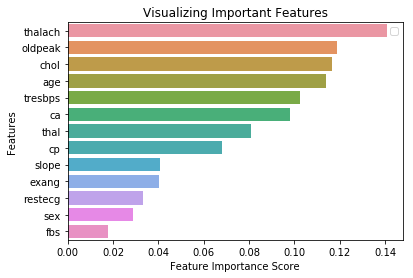

In [39]:
sb.barplot(x=feature_imp,y=feature_imp.index)
#add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### The top 5 important features are:
<ol>
<li>thalach</li>
<li>oldpeak</li>
<li>age</li>
<li>chol</li>
<li>ca</li>
</ol>

### **3. Rebuild the random forest using the top 5 features and record the model accuracy**

In [40]:
X = heartDiseaseData[['oldpeak','thalach','chol','age','ca']]
Y = heartDiseaseData['result']

X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=5)

#RandomForest Tree using Gini Index
rf= RandomForestClassifier(n_estimators=100)
#performing training
rf_train = rf.fit(X_train,Y_train)
predictions = rf_train.predict(X_test)
predictions

array([0, 2, 0, 2, 1, 1, 0, 0, 3, 0, 1, 1, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3])

In [41]:
print('Accuracy score for Random Forest with the top 5 features:' ,accuracy_score(Y_test,predictions))

Accuracy score for Random Forest with the top 5 features: 0.5833333333333334


### **4. Using the max_depth=3 and the top 5 features, rebuild the random forest model. Record the model accuracy.**

In [42]:
#RandomForest Tree using Gini Index
rf= RandomForestClassifier(max_depth=3,n_estimators=100)
#performing training
rf_train = rf.fit(X_train,Y_train)
predictions = rf_train.predict(X_test)
predictions

array([0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 3, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
print('Accuracy score for Random Forest with max_depth=3 and top 5 features:' ,accuracy_score(Y_test,predictions))

Accuracy score for Random Forest with max_depth=3 and top 5 features: 0.6333333333333333


### **5. Visualize the random forest built in Question-4**

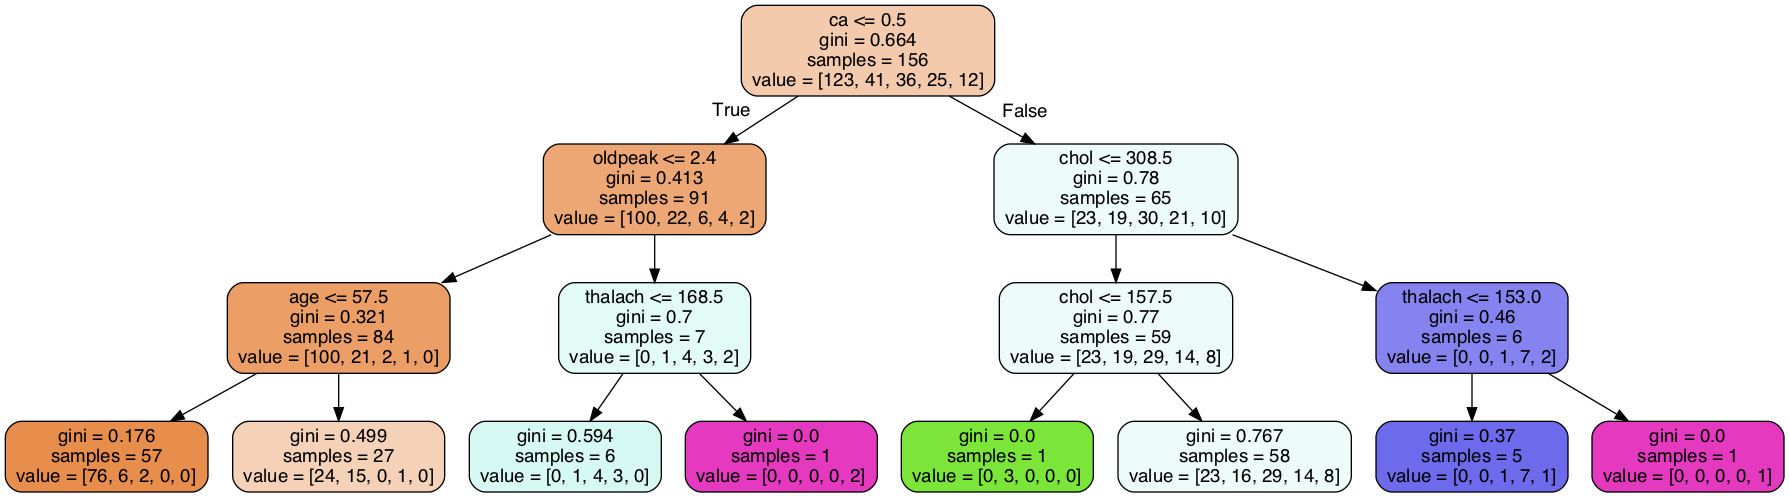

In [44]:
#extract a single tree
estimator = rf.estimators_[5]

#create dot data
dot_data = export_graphviz(estimator,out_file=None,feature_names=list(X_train.columns.values),
rounded=True,filled=True)

#create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)
print(graph)

#show graph
Image(graph.create_png())

### **6. Use entropy measure quality of split, max_depth=3 and top 5 features, build the random forest. Record the model accuracy.**

In [45]:
#RandomForest Tree 
rf= RandomForestClassifier(criterion='entropy',max_depth=3,n_estimators=100)
#performing training
rf_train = rf.fit(X_train,Y_train)
predictions = rf_train.predict(X_test)
predictions


array([0, 2, 0, 2, 0, 0, 0, 0, 3, 1, 0, 3, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
print('Accuracy score (Random Forest) using Entropy with max_depth=3 and top 5 features:' ,accuracy_score(Y_test,predictions))

Accuracy score (Random Forest) using Entropy with max_depth=3 and top 5 features: 0.6166666666666667


### **7. Visualize the random forest built in Question-6**

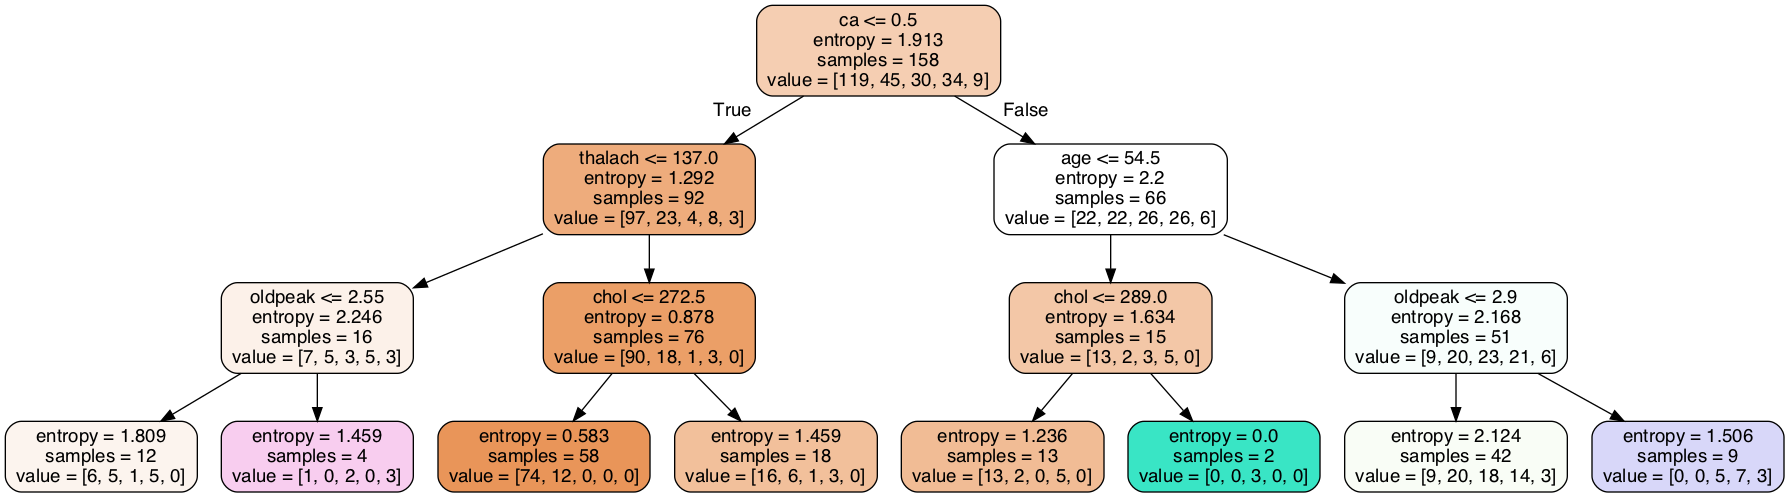

In [47]:
estimator = rf.estimators_[5]
dot_data = export_graphviz(estimator,out_file=None,feature_names=list(X_train.columns.values),
rounded=True,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
print(graph)
Image(graph.create_png())

### **8. Compare all random forest models so far you constructed using their accuracy**

|**RF Model**|Accuracy|
|--------|-----------|
|Random Forest|0.62|
|Random Forest with the top 5 features|0.55|
|Random Forest with max_depth=3 and top 5 features|0.65|
|Entropy with max_depth=3 and top 5 features|0.65|